# Week4-2 住宅価格の予測


In [65]:
import pandas as pd

df = pd.read_csv("train.csv")
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 【問題1】練習のために特徴量の選択
---
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [66]:
df_house = df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]
df_house

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


## 【問題2】線形回帰による推定と評価
---
データを簡単に分析、前処理し、 **線形回帰** による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

評価のための指標値は回帰問題では **平均二乗誤差（Mean Squared Error, MSE）**を使うことが一般的です。

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

>### データ分析

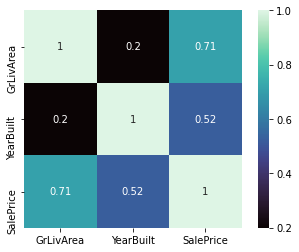

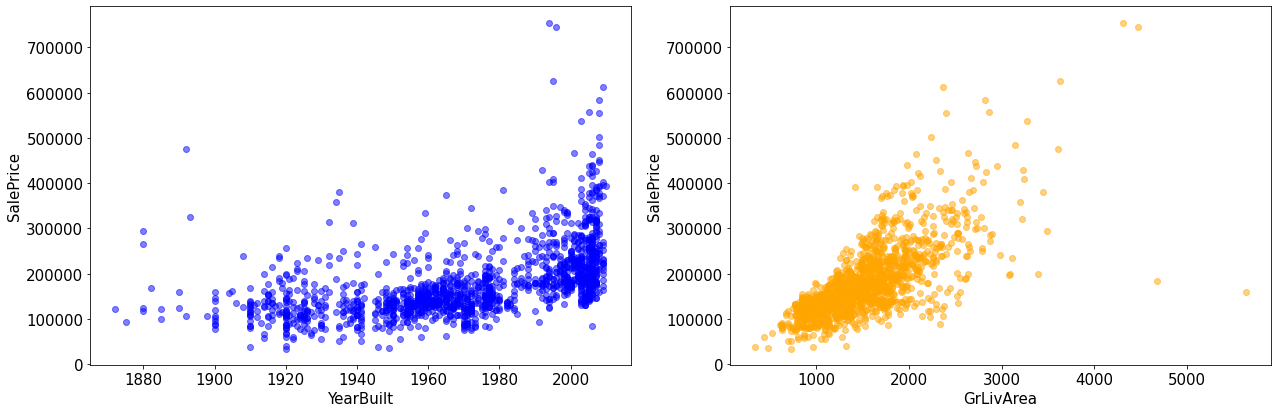

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 相関関係
df_corr = df_house.corr()
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_corr, square=True, annot=True, cmap=cmap)

# 散布図
plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1, 2, 1)   #1行２列の１番目
ax1.set_xlabel('YearBuilt')
ax1.set_ylabel('SalePrice')
ax1.scatter(df_house['YearBuilt'], df_house['SalePrice'], color='blue', alpha=0.5)

ax2 = fig.add_subplot(1, 2, 2)   #１行２列の２番目
ax2.set_xlabel('GrLivArea')
ax2.set_ylabel('SalePrice')
ax2.scatter(df_house['GrLivArea'], df_house['SalePrice'], color='orange', alpha=0.5)

plt.tight_layout()
plt.show()


>### 前処理

In [68]:
# 訓練と検証データの分割

import numpy as np
from sklearn.model_selection import train_test_split

# 訓練用データとテストデータに分けた後、データをdataFrameからndarrayに変換
X1 = df_house.loc[:, 'YearBuilt'].values
y1 = df_house.loc[:, 'SalePrice'].values

# 訓練データと検証データの分割
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

# 訓練できるデータ形式の２次元配列に変換
X1_train = X1_train.reshape(-1, 1)
X1_test = X1_test.reshape(-1, 1)
y1_train = y1_train.reshape(-1, 1)
y1_test = y1_test.reshape(-1, 1)

print("X1_trainのshape：", X1_train.shape)
print("X1_testのshape：", X1_test.shape)
print("y1_trainのshape：", y1_train.shape)
print("y1_testのshape：", y1_test.shape)

X1_trainのshape： (1095, 1)
X1_testのshape： (365, 1)
y1_trainのshape： (1095, 1)
y1_testのshape： (365, 1)


>## 単回帰分析
---

In [69]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
# 学習
model.fit(X1_train, y1_train)

# 予測
y1_pred = model.predict(X1_test)

print('----- 単回分析 Year Built-----')

# 直線の傾き（重み）
print('直線の傾き：%.5f' % model.coef_)
 
# 切片 (誤差)
print('切片：%.5f' % model.intercept_)

# 決定係数
print('score train: %.5f' % model.score(X1_train, y1_train))
print('score test: %.5f' % model.score(X1_test, y1_test))
print('MSE: %.5f' % mean_squared_error(y1_test, y1_pred))

----- 単回分析 Year Built-----
直線の傾き：1368.99631
切片：-2517567.32154
score train: 0.27517
score test: 0.26839
MSE: 4830018416.25177


>### 可視化

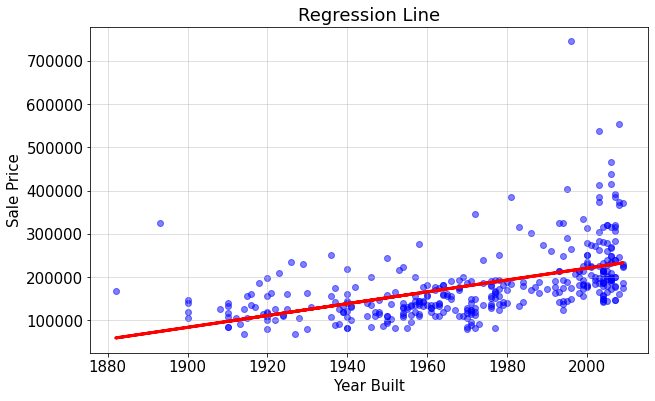

In [70]:
plt.rcParams['font.size'] = 15
plt.figure(figsize = (10, 6))
plt.scatter(X1_test, y1_test, color = 'blue', alpha=0.5)         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X1_test, y1_pred, color = 'red', linewidth=3) # 回帰直線をプロット

plt.title('Regression Line')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.grid(alpha=0.5)              
plt.show()  

In [71]:
# 評価（平均二乗誤差 MSE）
from sklearn.metrics import mean_squared_error

print('MSE: %.5f' % mean_squared_error(y1_test, y1_pred, squared=False))

MSE: 69498.33391


>## データ分析（GrLivArea)
---

In [72]:
# 訓練と検証データの分割

import numpy as np
from sklearn.model_selection import train_test_split

# 訓練用データとテストデータに分けた後、データをdataFrameからndarrayに変換
X2 = df_house.loc[:, 'GrLivArea'].values
y2 = df_house.loc[:, 'SalePrice'].values

# 訓練データと検証データの分割
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)

# データをreshape(-1,1)にする必要がある
X2_train = X2_train.reshape(-1, 1)
X2_test = X2_test.reshape(-1, 1)
y2_train = y2_train.reshape(-1, 1)
y2_test = y2_test.reshape(-1, 1)

print("X2_trainのshape：", X2_train.shape)
print("X2_testのshape：", X2_test.shape)
print("y2_trainのshape：", y2_train.shape)
print("y2_testのshape：", y2_test.shape)

X2_trainのshape： (1095, 1)
X2_testのshape： (365, 1)
y2_trainのshape： (1095, 1)
y2_testのshape： (365, 1)


>### 学習

In [73]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 学習
model.fit(X2_train, y2_train)

# 予測
y2_pred = model.predict(X2_test)

print('----- 単回分析 GrLivArea -----')

# 直線の傾き（重み）
print('直線の傾き：%.5f' % model.coef_)
 
# 切片 (誤差)
print('切片：%.5f' % model.intercept_)

# 決定係数
print('score train: %.5f' % model.score(X2_train, y2_train))
print('score test: %.5f' % model.score(X2_test, y2_test))
print('MSE: %.5f' % mean_squared_error(y2_test, y2_pred))


----- 単回分析 GrLivArea -----
直線の傾き：110.42073
切片：12764.36075
score train: 0.52381
score test: 0.43879
MSE: 3705065901.94967


>### 可視化

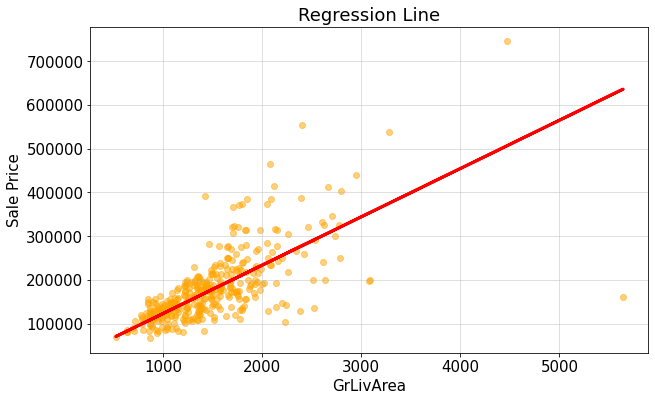

In [74]:
plt.rcParams['font.size'] = 15
plt.figure(figsize = (10, 6))
plt.scatter(X2_test, y2_test, color = 'orange', alpha=0.5)         # 説明変数と目的変数のデータ点の散布図をプロット
# plt.scatter(X1_test, y1_test, color = 'green', alpha=0.5)         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X2_test, y2_pred, color = 'red', linewidth=3) # 回帰直線をプロット

plt.title('Regression Line')
plt.xlabel('GrLivArea')
plt.ylabel('Sale Price')
plt.grid(alpha=0.5)              
plt.show()  

>## 重回帰分析

In [75]:
# 訓練と検証データの分割

import numpy as np
from sklearn.model_selection import train_test_split

# 訓練用データとテストデータに分けた後、データをdataFrameからndarrayに変換
X = df_house.loc[:, ['YearBuilt', 'GrLivArea']].values
y = df_house.loc[:, 'SalePrice'].values

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)

X_trainのshape： (1095, 2)
X_testのshape： (365, 2)
y_trainのshape： (1095,)
y_testのshape： (365,)


In [76]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

>### 学習

In [77]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 学習
model.fit(X_train_std, y_train)

# 予測
y_pred = model.predict(X_test_std)

print('----- 重回分析 -----')

# 切片 (誤差)
print('切片：%.5f' % model.intercept_)

# 決定係数
print('score train: %.5f' % model.score(X_train_std, y_train))
print('score test: %.5f' % model.score(X_test_std, y_test))

# パラメータ算出
reg_wn = model.coef_                       # 偏回帰係数
reg_w0 = model.intercept_                  # 切片
print('coef : ', reg_wn)
print('intercept : %.5f' % reg_w0)
print('Liner Regression MSE: %.5f' % mean_squared_error(y_test, y_pred))


----- 重回分析 -----
切片：180733.14977
score train: 0.67697
score test: 0.58710
coef :  [31435.11963558 50915.49019418]
intercept : 180733.14977
Liner Regression MSE: 2725908099.06364


In [31]:
def plot_graph(X_train, X_test, y_train, y_pred):
    '''
    学習した結果を可視化する関数
    Parameters:
    ---------------------
        X_train : 2D-array
            説明変数の訓練データ
        X_test : 2D-array
            説明変数の検証データ
        y_train：1D-array
            目的変数の訓練データ
        y_pred：1D-array
            予測したデータ
    '''
    
    # 散布図
    plt.rcParams['font.size'] = 15
    fig = plt.figure(figsize=(20,6))

    ax1 = fig.add_subplot(1, 2, 1)   #1行２列の１番目
    ax1.set_xlabel('YearBuilt')
    ax1.set_ylabel('SalePrice')
    ax1.scatter(X_train[:, 0], y_train, color = 'blue', alpha=0.5, label = 'YearBuilt') 
    ax1.plot(np.sort(X_test[:, 0]), y_pred, color = 'red') # 回帰直線をプロット

    ax2 = fig.add_subplot(1, 2, 2)   #１行２列の２番目
    ax2.set_xlabel('GrLivArea')
    ax2.set_ylabel('SalePrice')

    ax2.scatter(X_train[:, 1], y_train, color = 'orange', alpha=0.5, label = 'GrLivArea') 
    ax2.plot(np.sort(X_test[:, 1]), y_pred, color = 'red')

    plt.tight_layout()
    plt.show()

>### 可視化

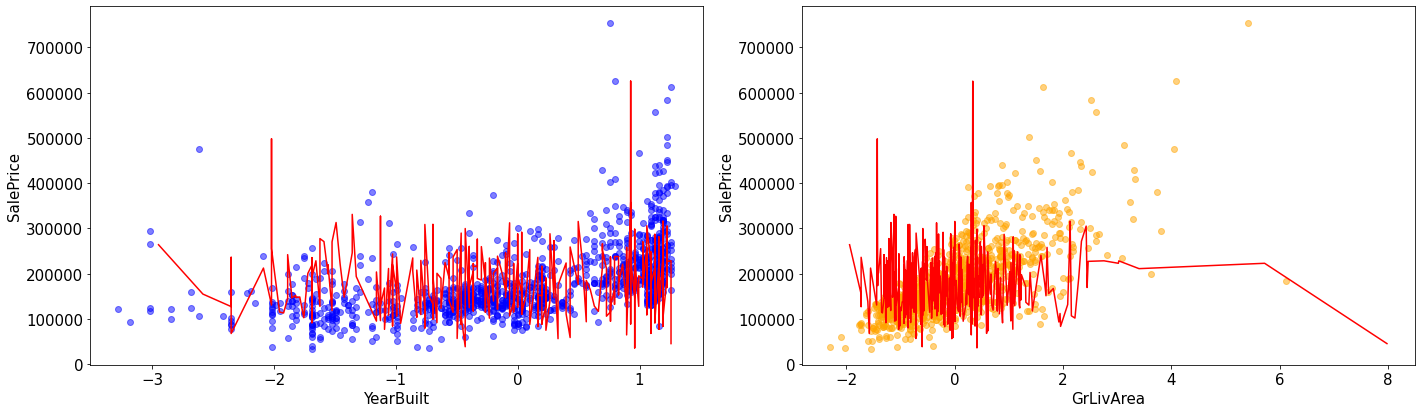

In [32]:
plot_graph(X_train_std, X_test_std, y_train, y_pred)

>## 3Dで可視化

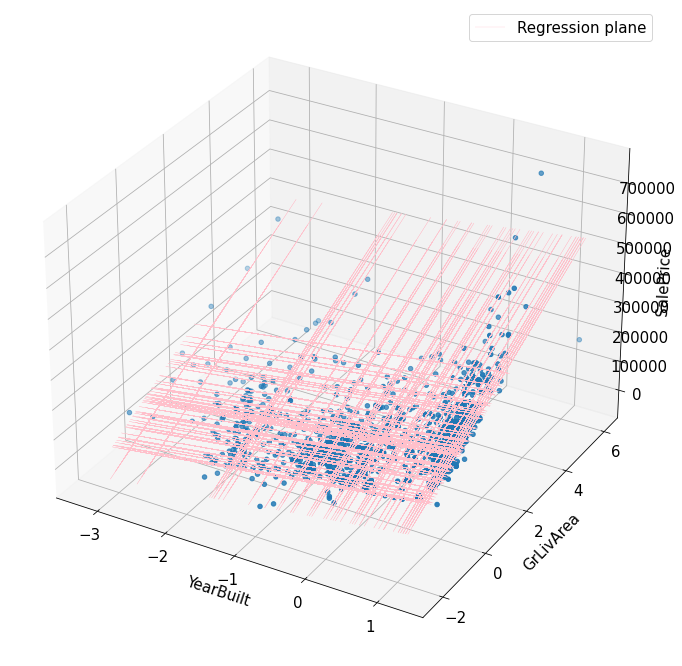

In [33]:
# パラメータ算出
reg_wn = model.coef_                       # 偏回帰係数
reg_w0 = model.intercept_                  # 切片
r2 = model.score(X_train_std, y_train)     # 決定係数
# print(reg_wn)
# print(reg_w0)
# print(r2)

# 回帰平面
X_, Y_ = np.meshgrid(X_train_std[:, 0], X_train_std[:, 1])                             # x軸とy軸からグリッドデータを作成
# X_, Y_ = np.meshgrid(X1, X2) 
Z = reg_w0 + (reg_wn[0] * X_) + (reg_wn[1] * Y_)   # 回帰平面のz値を作成

# Axes3Dオブジェクトの生成
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X_train_std[:, 0], X_train_std[:, 1], y_train)
ax.set_xlabel("YearBuilt")
ax.set_ylabel("GrLivArea")
ax.set_zlabel("SalePrice")
ax.plot_wireframe(X_, Y_, Z, color='pink', linewidth=0.3,  label='Regression plane')
plt.legend()
plt.show()


## 【問題3】手法の比較
---
以下のすべての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

-    線形回帰
-    SVM
-    決定木
-    ランダムフォレスト


In [34]:
# 訓練と検証データの分割

import numpy as np
from sklearn.model_selection import train_test_split

X = df_house.loc[:, ['YearBuilt', 'GrLivArea']].values
y = df_house.loc[:, 'SalePrice'].values

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)

X_trainのshape： (1095, 2)
X_testのshape： (365, 2)
y_trainのshape： (1095,)
y_testのshape： (365,)


In [35]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

>## SVM

>### 学習

In [36]:
#SVRモデル
from sklearn.svm import SVR

# サポートベクターマシンによる学習
model_svr = SVR(C=1.0, kernel='linear', gamma='auto', epsilon=0.1)  # 線形カーネルを使用
model_svr.fit(X_train_std, y_train)                                                   # フィッティング

y_pred_svr = model_svr.predict(X_test_std)

print('SVM MSE: %.5f' % mean_squared_error(y_test, y_pred_svr))

SVM MSE: 6833406643.96198


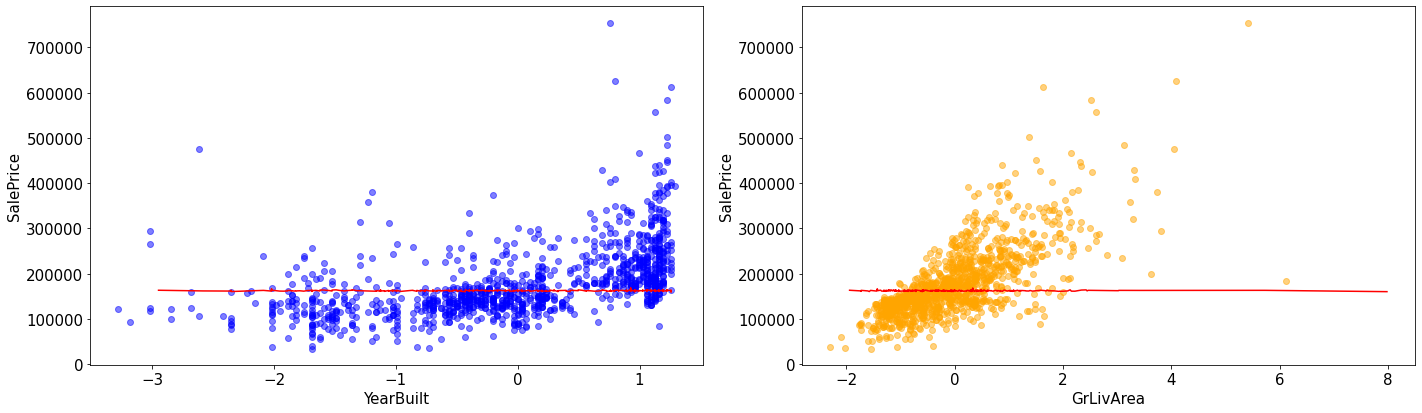

In [37]:
# 可視化
plot_graph(X_train_std, X_test_std, y_train, y_pred_svr)

>## 決定木

In [38]:
from sklearn.tree import DecisionTreeRegressor

# モデル構築、木の深さは3に固定
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X_train_std, y_train)
y_pred_tree = tree.predict(X_test_std)

print('Decision Tree MSE: %.5f' % mean_squared_error(y_test, y_pred_tree))


Decision Tree MSE: 2584602545.95026


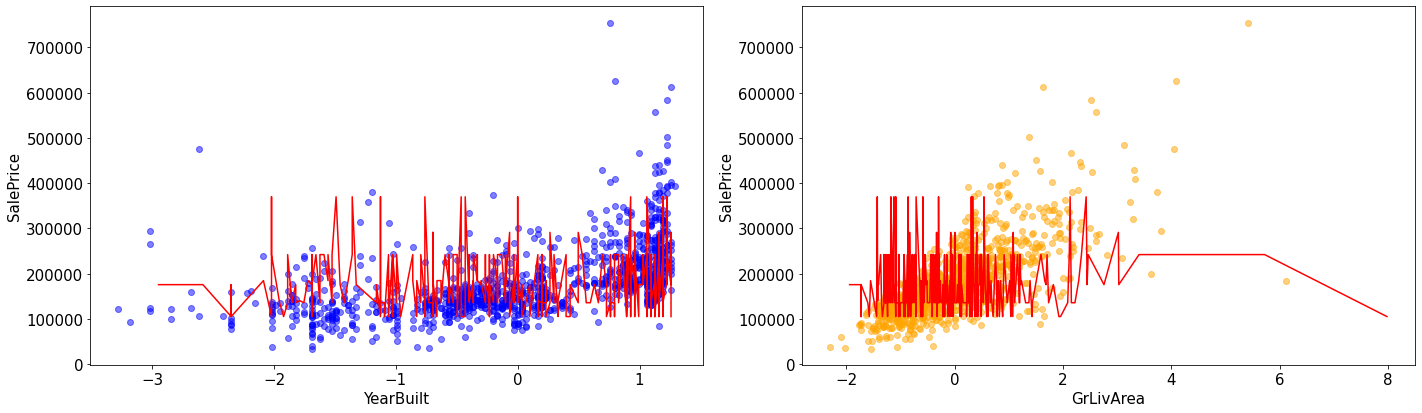

In [39]:
# 可視化
plot_graph(X_train_std, X_test_std, y_train, y_pred_tree)

>## ランダムフォレスト

In [40]:
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train_std, y_train)
y_train_pred_forest = forest.predict(X_train_std)
y_test_pred_forest = forest.predict(X_test_std)

print('Random Forest MSE test: %.5f' % mean_squared_error(y_test, y_test_pred_forest))

Random Forest MSE test: 1834913862.46217


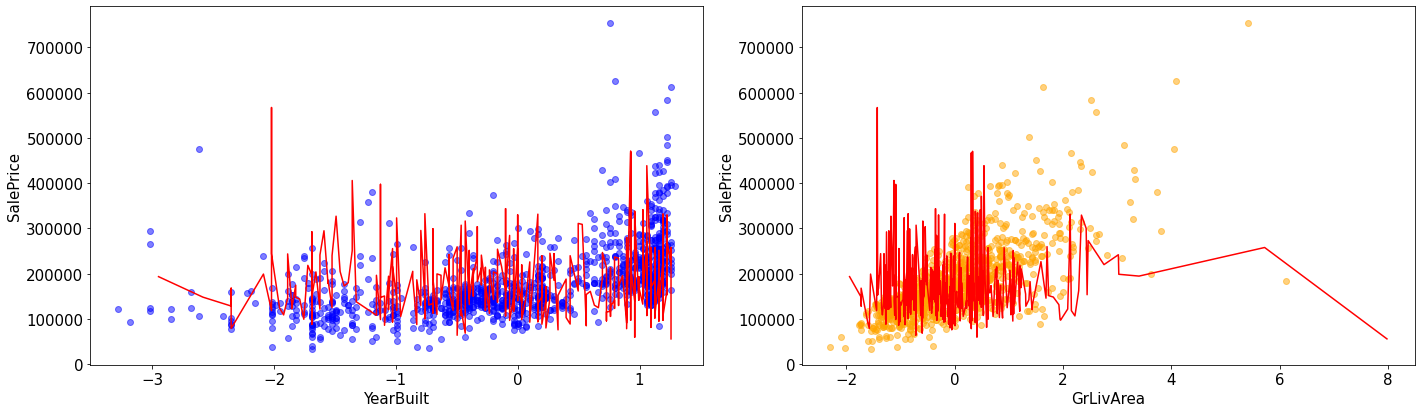

In [41]:
plot_graph(X_train_std, X_test_std, y_train, y_test_pred_forest)

>### 各モデルの指標値の表

|                    | MSE  | 
| ------------------ | -------- | 
| 線形回帰           | 2725908099.06364     |
| SVM                | 6833406643.96198     | 
| 決定木             | 2584602545.95026     | 
| ランダムフォレスト | 1833275207.47120     | 


    各モデルの指標値を比較すると、「ランダムフォレスト」が一番良い結果となった。
    一方、SVMモデルは一番悪い結果となっている。
    グラフに関しては、SVMの予測結果は一直線の方がグラフになった。
    それ以外のグラフに関しては予測値が分散されているように見える。

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
---
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

<AxesSubplot:>

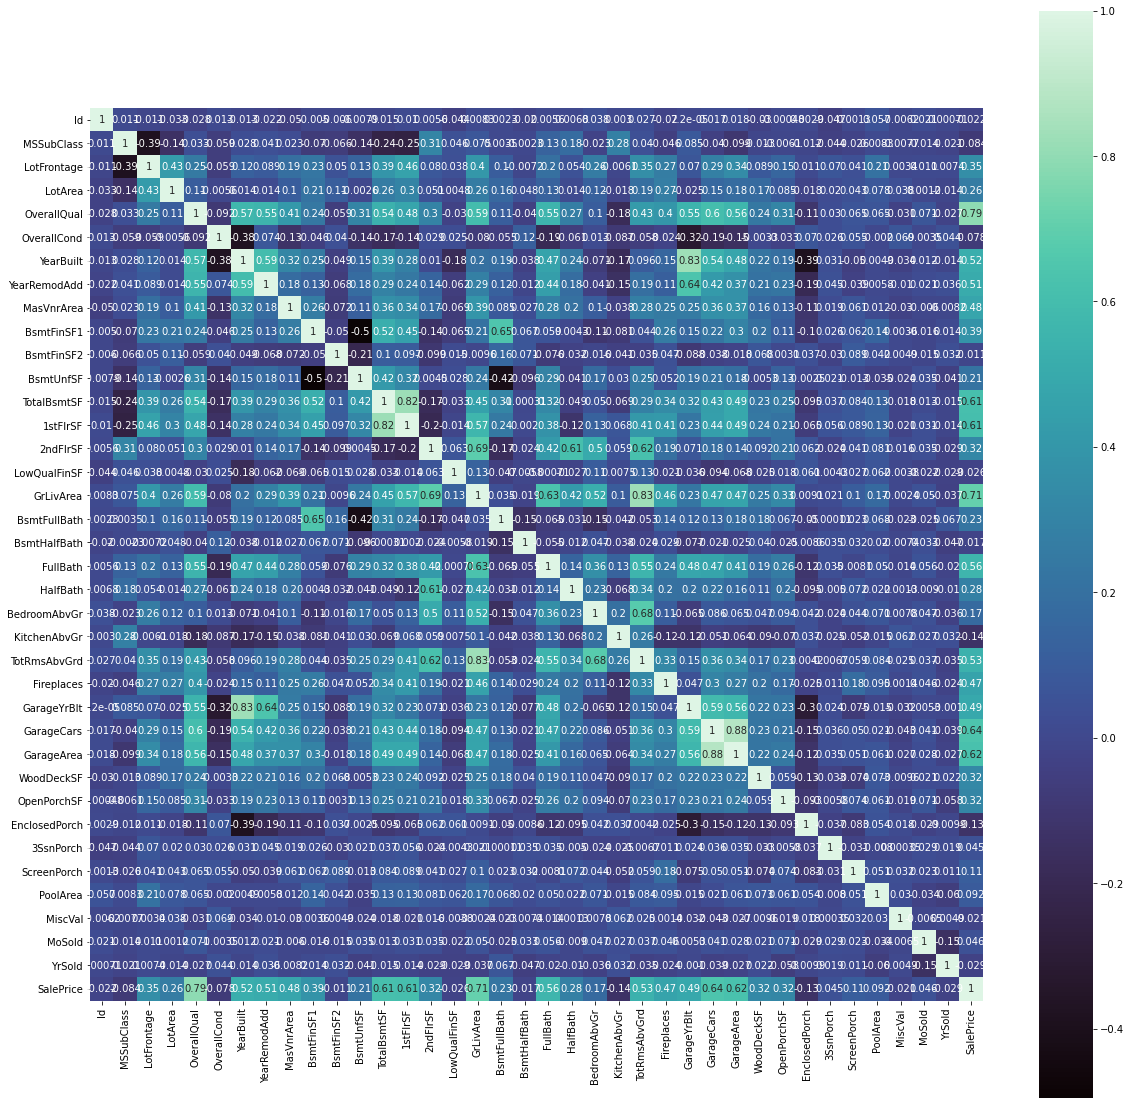

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 20))

df_corr = df.corr()
cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df_corr, square=True, annot=True, cmap=cmap)

### 上のヒートマップ図でSalePriceと相関が高い「OverallQual」の特徴量を追加してみる。

In [43]:
df_house_extra = df.loc[:, ['GrLivArea', 'YearBuilt', 'OverallQual','SalePrice']]
df_house_extra

,GrLivArea,YearBuilt,OverallQual,SalePrice
0,1710,2003,7,208500
1,1262,1976,6,181500
2,1786,2001,7,223500
3,1717,1915,7,140000
4,2198,2000,8,250000
...,...,...,...,...
1455,1647,1999,6,175000
1456,2073,1978,6,210000
1457,2340,1941,7,266500
1458,1078,1950,5,142125


In [44]:
# 訓練用データとテストデータに分けた後、データをdataFrameからndarrayに変換
X = df_house_extra.loc[:, ['YearBuilt', 'GrLivArea', 'OverallQual']].values
y = df_house_extra.loc[:, 'SalePrice'].values

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_trainのshape：", X_train.shape)
print("X_testのshape：", X_test.shape)
print("y_trainのshape：", y_train.shape)
print("y_testのshape：", y_test.shape)

X_trainのshape： (1095, 3)
X_testのshape： (365, 3)
y_trainのshape： (1095,)
y_testのshape： (365,)


In [45]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) #trainデータのみFitを実行する
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [46]:
#線形回帰モデル
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# 学習
model.fit(X_train_std, y_train)

# 予測
y_pred = model.predict(X_test_std)

print('----- 重回分析 特徴量を追加した場合-----')

# 切片 (誤差)
print('切片：%.5f' % model.intercept_)

# 決定係数
print('score train: %.5f' % model.score(X_train_std, y_train))
print('score test: %.5f' % model.score(X_test_std, y_test))

# パラメータ算出
reg_wn = model.coef_                       # 偏回帰係数
reg_w0 = model.intercept_                  # 切片
print('coef : ', reg_wn)
print('intercept : %.5f' % reg_w0)
print('Liner Regression MSE: %.5f' % mean_squared_error(y_test, y_pred))


----- 重回分析 特徴量を追加した場合-----
切片：180733.14977
score train: 0.74978
score test: 0.69928
coef :  [15677.35766147 34875.57345868 32494.45085738]
intercept : 180733.14977
Liner Regression MSE: 1985343070.81486


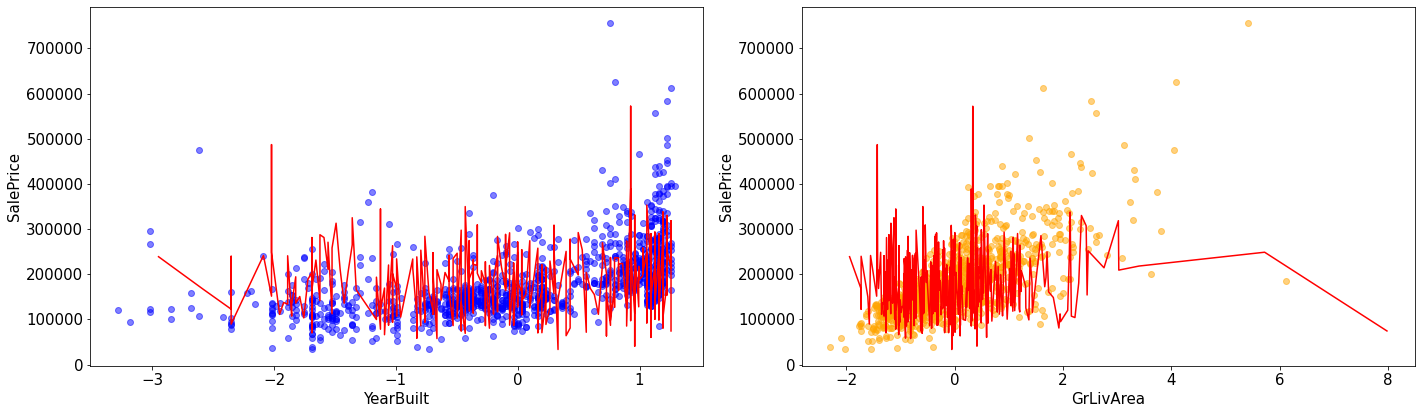

In [47]:
plot_graph(X_train_std[:, :2], X_test_std[:, :2], y_train, y_pred)

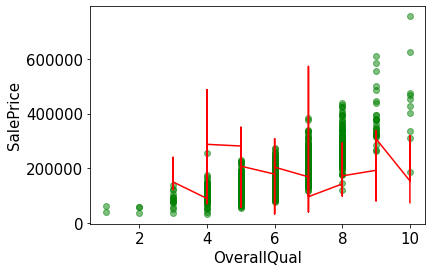

In [48]:
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.scatter(X_train[:, 2], y_train, color = 'green', alpha=0.5, label = 'OverallQual') 
plt.plot(np.sort(X_test[:, 2]), y_pred, color = 'red') # 回帰直線をプロット

plt.show()

### 特徴量を追加した結果

追加前の場合　MSE: 2725908099.06364  
追加後の場合　MSE: 1985343070.81486

特徴量を追加したほうが、指標値がより良い値になることが分かった。
